In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib import style
style.use('ggplot')
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
img = cv2.imread("D:/whitefly v2/005.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

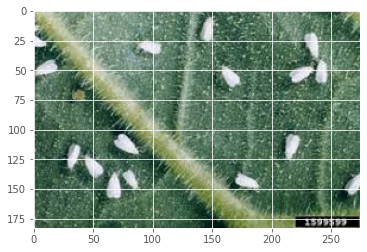

In [3]:
plt.imshow(img)

In [4]:
def plot(r, g, b):
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(r, g, b)
    plt.show()

c:\users\aiman\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  This is separate from the ipykernel package so we can avoid doing imports until


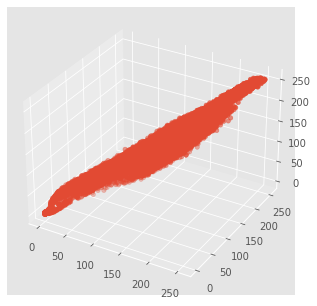

In [5]:
r, g, b = cv2.split(img)

r = r.flatten()
g = g.flatten()
b = b.flatten()

plot(r, g, b)

In [6]:
vectorized = img.reshape((-1, 3))

In [7]:
vectorized.shape

(50325, 3)

In [8]:
vectorized

array([[167, 172, 108],
       [176, 180, 119],
       [198, 201, 146],
       ...,
       [ 85,  89,  72],
       [ 80,  85,  63],
       [129, 134, 111]], dtype=uint8)

In [9]:
vectorized = np.float32(vectorized)

In [10]:
vectorized

array([[167., 172., 108.],
       [176., 180., 119.],
       [198., 201., 146.],
       ...,
       [ 85.,  89.,  72.],
       [ 80.,  85.,  63.],
       [129., 134., 111.]], dtype=float32)

In [11]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 1.0)

In [12]:
k = 2
attempts = 20
ret, label, center = cv2.kmeans(vectorized, k, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)

In [13]:
center = np.uint8(center)

In [14]:
res = center[label.flatten()]
result_image = res.reshape((img.shape))

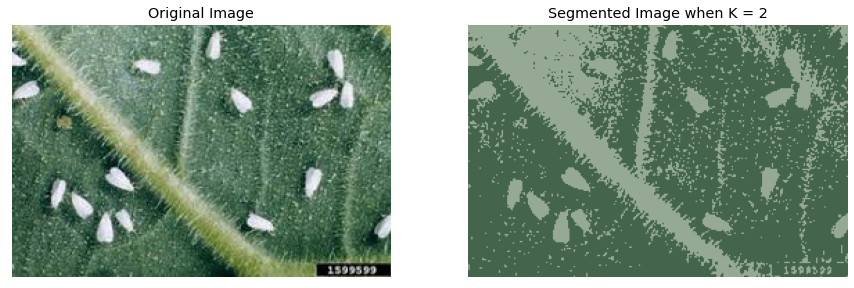

In [15]:
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % k), plt.xticks([]), plt.yticks([])
plt.show()

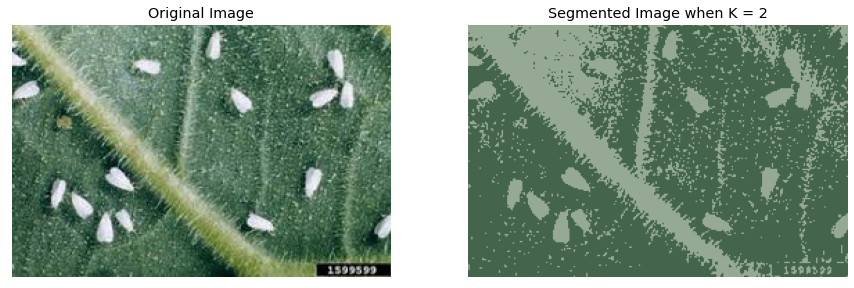

In [16]:
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % k), plt.xticks([]), plt.yticks([])
plt.show()

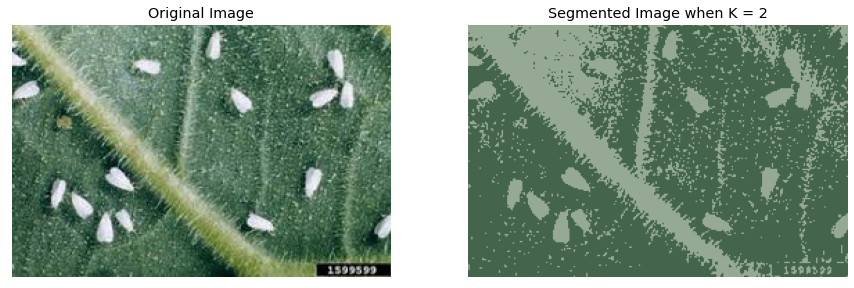

In [17]:
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % k), plt.xticks([]), plt.yticks([])
plt.show()

In [18]:
#plt.scatter(vectorized[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
#plt.scatter(vectorized[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
#plt.scatter(vectorized[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
#plt.scatter(vectorized[y_kmeans==3, 0], X[y_kmeans==3, 1], s=100, c='cyan', label ='Cluster 4')
#plt.scatter(vectorized[y_kmeans==4, 0], X[y_kmeans==4, 1], s=100, c='magenta', label ='Cluster 5')

In [19]:
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
#plt.title('')
#plt.xlabel('')
#plt.ylabel('')
#plt.show()

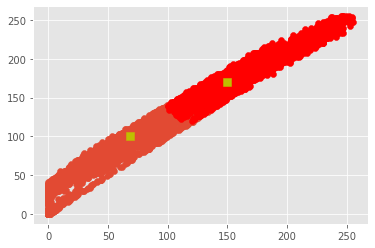

In [20]:
A = vectorized[label.ravel()==0]
B = vectorized[label.ravel()==1]

# Plot the data
plt.scatter(A[:,0],A[:,1])
plt.scatter(B[:,0],B[:,1],c = 'r')
plt.scatter(center[:,0],center[:,1],s = 80,c = 'y', marker = 's')
# plt.xlabel(''),plt.ylabel('')
plt.show()

In [21]:
print(A)

[[ 98. 126. 104.]
 [108. 137. 107.]
 [102. 131. 101.]
 ...
 [103. 105.  94.]
 [ 85.  89.  72.]
 [ 80.  85.  63.]]


In [22]:
print(B)

[[167. 172. 108.]
 [176. 180. 119.]
 [198. 201. 146.]
 ...
 [123. 124. 118.]
 [128. 130. 117.]
 [129. 134. 111.]]


In [23]:
img = cv2.imread("D:/aphid/005.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

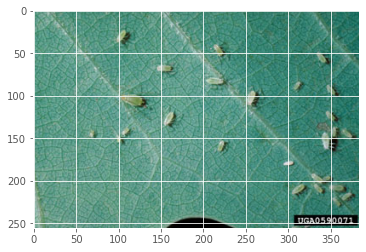

In [24]:
plt.imshow(img)

In [25]:
def plot(r, g, b):
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(r, g, b)
    plt.show()

c:\users\aiman\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  This is separate from the ipykernel package so we can avoid doing imports until


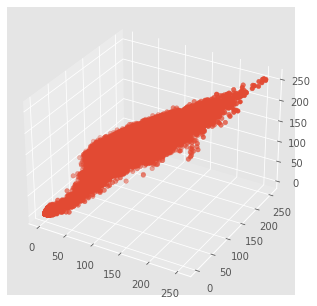

In [26]:
r, g, b = cv2.split(img)

r = r.flatten()
g = g.flatten()
b = b.flatten()

plot(r, g, b)

In [27]:
vectorized = img.reshape((-1, 3))

In [28]:
vectorized.shape

(98304, 3)

In [29]:
vectorized

array([[103, 163, 135],
       [ 76, 140, 113],
       [ 69, 131, 106],
       ...,
       [ 46, 117, 103],
       [ 53, 119, 107],
       [ 64, 128, 114]], dtype=uint8)

In [30]:
vectorized = np.float32(vectorized)

In [31]:
vectorized

array([[103., 163., 135.],
       [ 76., 140., 113.],
       [ 69., 131., 106.],
       ...,
       [ 46., 117., 103.],
       [ 53., 119., 107.],
       [ 64., 128., 114.]], dtype=float32)

In [32]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

In [33]:
k = 4
attempts = 20
ret, label, center = cv2.kmeans(vectorized, k, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)

In [34]:
center = np.uint8(center)

In [35]:
res = center[label.flatten()]
result_image = res.reshape((img.shape))

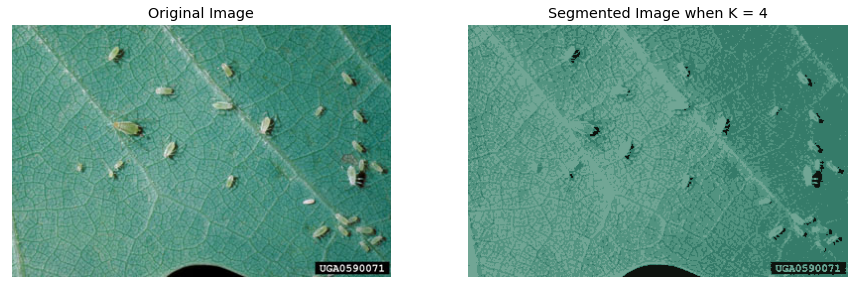

In [36]:
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % k), plt.xticks([]), plt.yticks([])
plt.show()

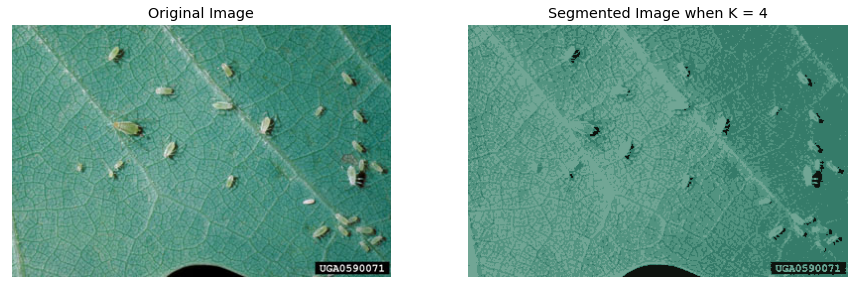

In [37]:
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % k), plt.xticks([]), plt.yticks([])
plt.show()

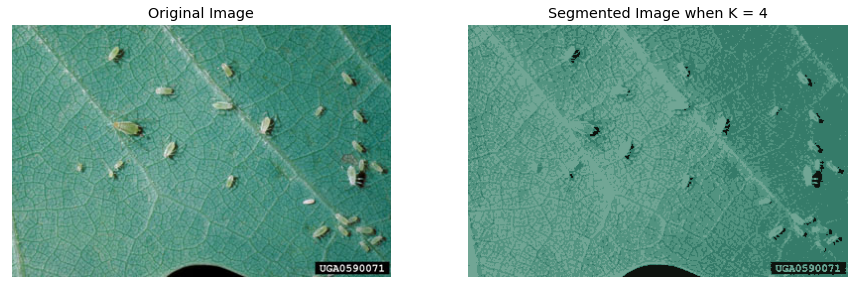

In [38]:
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % k), plt.xticks([]), plt.yticks([])
plt.show()

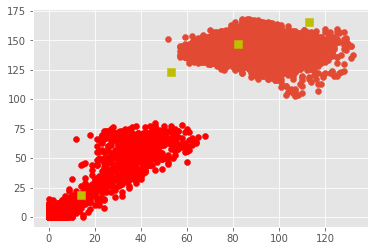

In [39]:
A = vectorized[label.ravel()==0]
B = vectorized[label.ravel()==1]

# Plot the data
plt.scatter(A[:,0],A[:,1])
plt.scatter(B[:,0],B[:,1],c = 'r')
plt.scatter(center[:,0],center[:,1],s = 80,c = 'y', marker = 's')
# plt.xlabel('Height'),plt.ylabel('Weight')
plt.show()

In [ ]:
print(A)

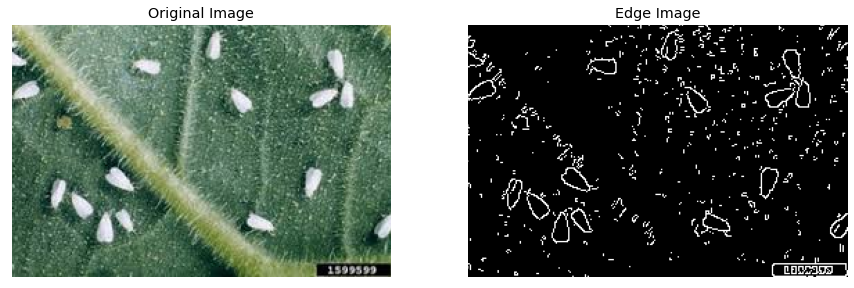

In [27]:
edges = cv2.Canny(img,300,350)
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [22]:
#X, y = np.arange(10).reshape((5, 2)), range(5)

In [20]:
X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=33, train_size=20, random_state=10)

In [21]:
clf = SVC(random_state=0)
clf.fit(X_train, y_train)

SVC(random_state=0)

In [27]:
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

[[16  4]
 [ 2 11]]


c:\users\aiman\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':
c:\users\aiman\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.


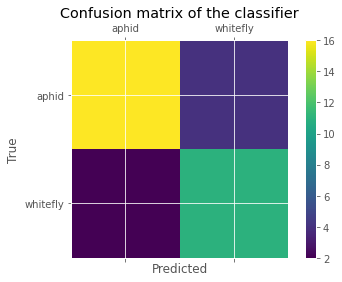

In [28]:
labels = ['aphid', 'whitefly']
#cm = confusion_matrix(y_test, y_train)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

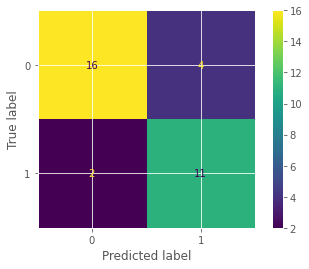

In [23]:
disp.plot()

In [29]:
target_names = ['aphid', 'whitefly']
print(classification_report(y_test, predictions, target_names=target_names))

              precision    recall  f1-score   support

       aphid       0.89      0.80      0.84        20
    whitefly       0.73      0.85      0.79        13

    accuracy                           0.82        33
   macro avg       0.81      0.82      0.81        33
weighted avg       0.83      0.82      0.82        33



In [ ]:
confusion_matrix(y_test, y_pred)